In [15]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy import mean

In [16]:
def s(n):
    return sum([[-1,1][random.randrange(2)] for _ in range(n)])

In [17]:
bins = {}
k = 10000
for N in [5]:
    for n in range(-N, N + 1, 2):
        bins[n] = 0
    for _ in range(k):
        bins[s(N)]+=1
print(bins)

{-5: 313, -3: 1594, -1: 3145, 1: 3094, 3: 1574, 5: 280}


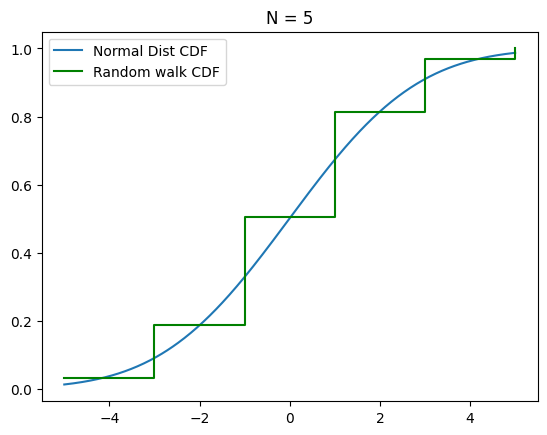

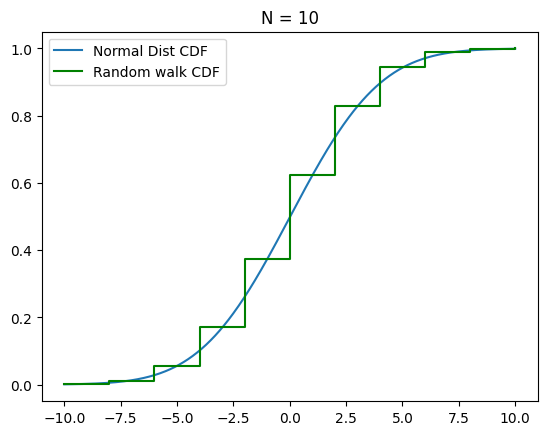

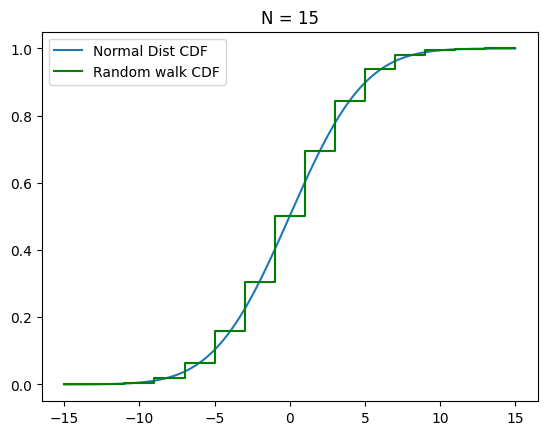

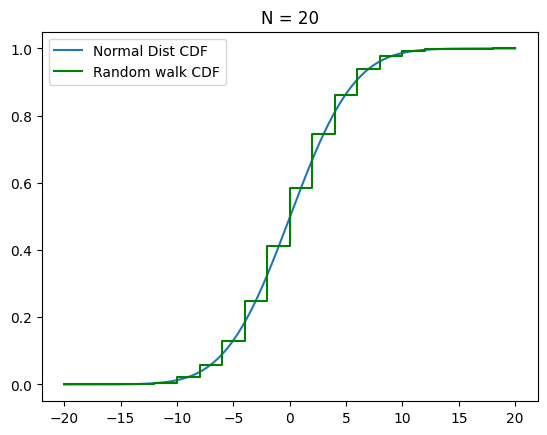

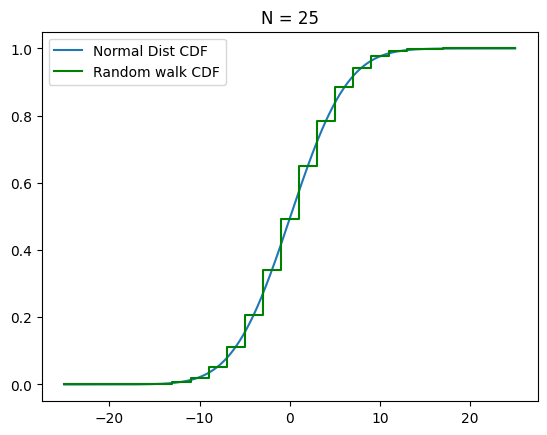

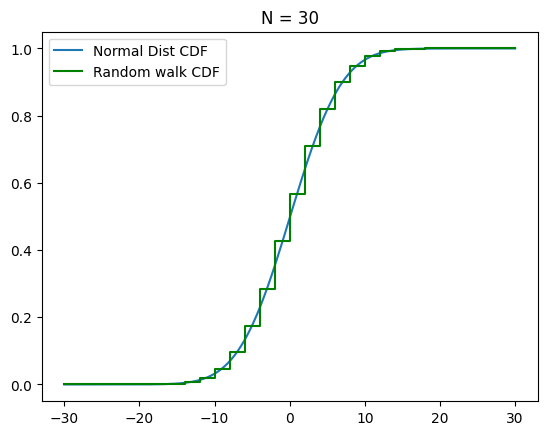

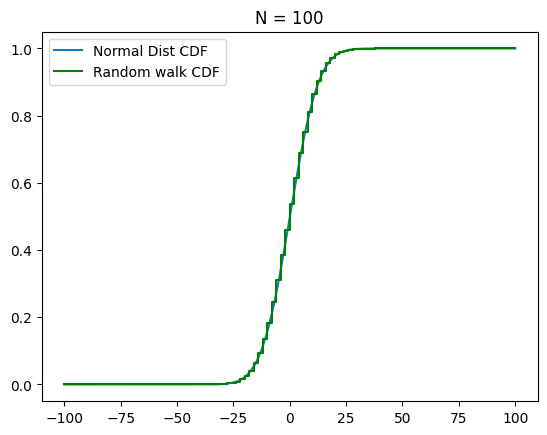

In [28]:
k = 10000
for N in [5,10,15,20,25,30,100]:
    bins = {}
    for n in range(-N, N + 1, 2):
        bins[n] = 0
    Sn = []
    for _ in range(k):
        v = s(N)
        Sn.append(v)
        bins[v]+=1
    b = {}
    cumsum = 0
    for e in bins:
        cumsum += bins[e] / k
        b[e] = cumsum

    x = b.keys()
    y = b.values()

    normx = np.linspace(-N, N, 500)
    normy = ss.norm.cdf(normx, loc = np.mean(Sn), scale = np.std(Sn))
    
    plt.title("N = "+str(N))
    plt.plot(normx, normy, label="Normal Dist CDF")
    plt.step(x, y, 1, color='g', where='post', label="Random walk CDF")


    # remove duplicate labels
    handles, labels = plt.gca().get_legend_handles_labels() 
    labels = dict(zip(labels, handles))

    plt.legend(labels.values(), labels.keys())
    plt.savefig("plots/plotN"+str(N)+".png")
    plt.show()
